In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [2]:
H = 4
models = ['SVR','MLP']
strategies = ['Iter', 'Dir', 'MIMO']
steps = [str(h) + " week-ahead" for h in range(1,H+1)]

In [3]:
open_path = 'C:/D/HUST/research_flu_forecast/experiment/result/New/'

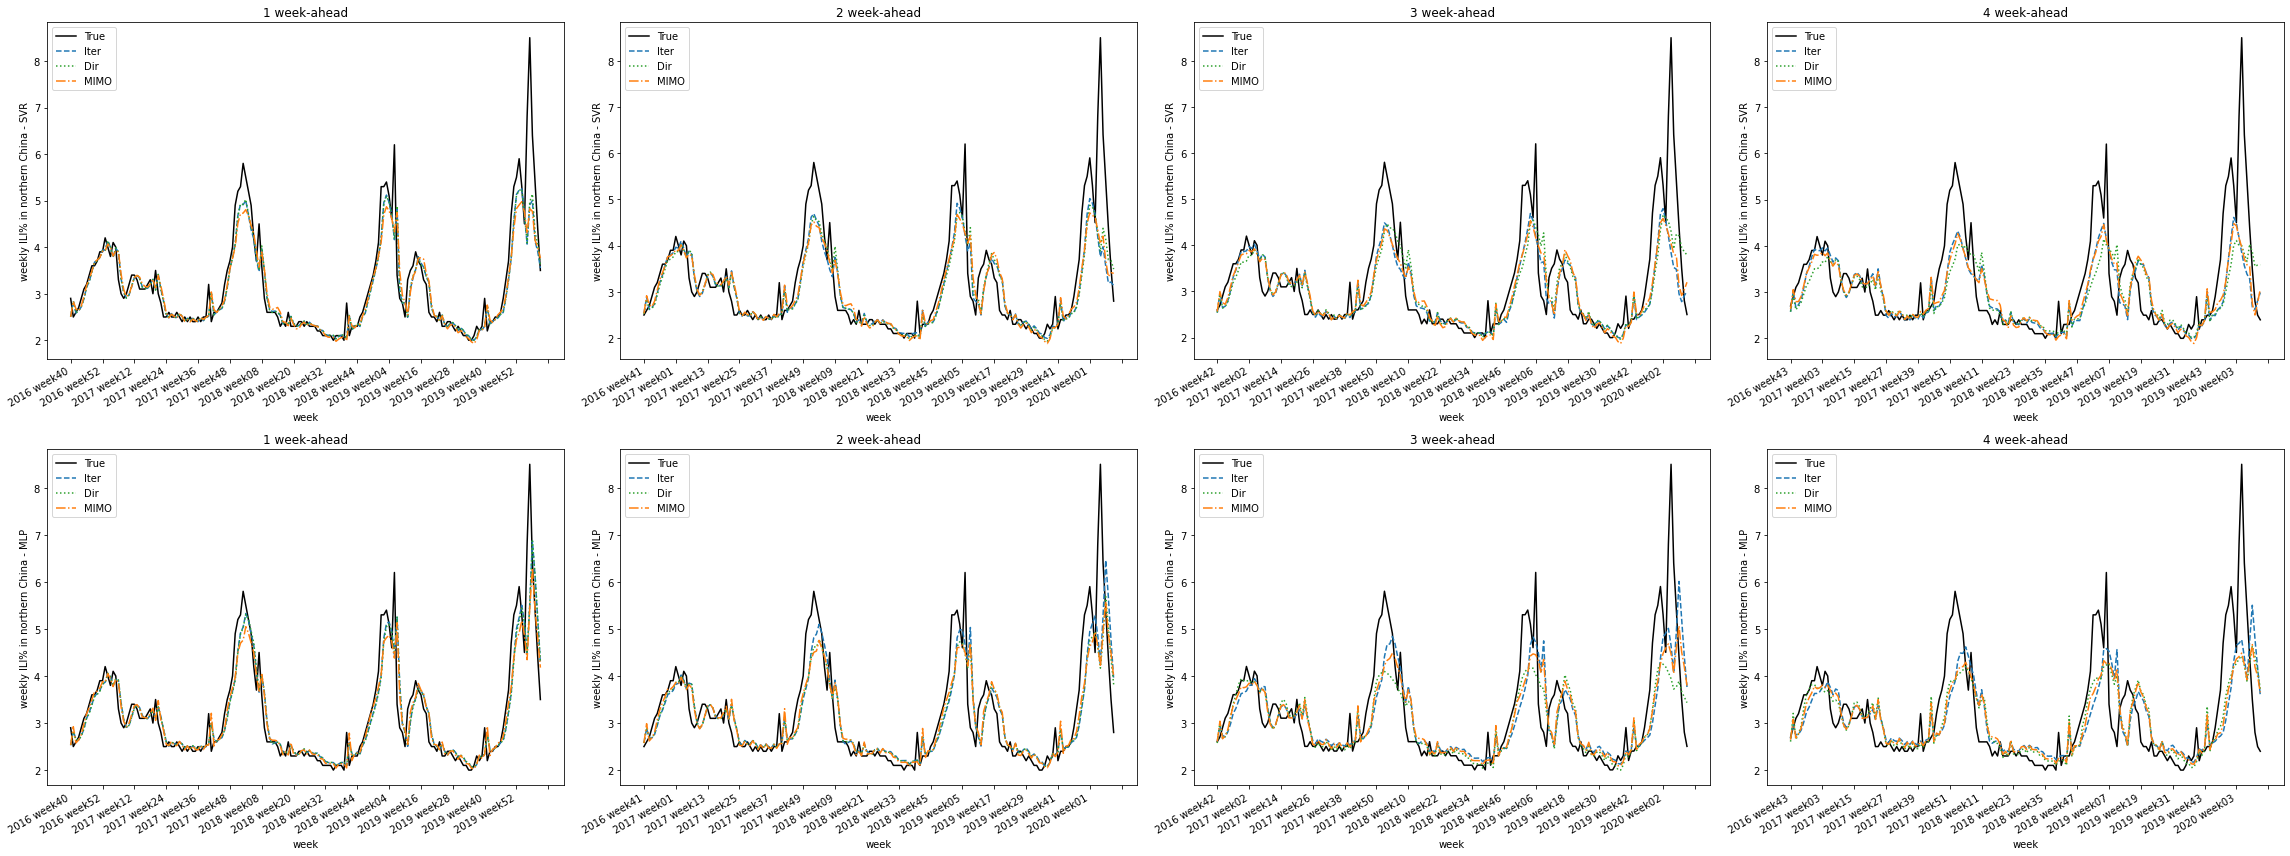

In [59]:
#Nori layout1
label = 'Nori'

s_v = []
for h in range(H):
    s_v.append(dict())

fig, axs = plt.subplots(2,H, figsize=(32,12))    


week_tags = pd.read_excel("C:/D/HUST/research_flu_forecast/influenza data/ILI_201001_202012/ILI _201001_202012.xlsx")['time'].dropna().values.tolist()
#averaged results of each model
for m, model in enumerate(models):
    for s in strategies:
        #先读取rank1的内容
        file_name_r1 = label + "_" + model + "_" + s + "_y" + str(H) + "_rank1.xlsx"
        y_test = pd.read_excel(open_path + label+ "/" + model + "_" + s + "/" + file_name_r1, sheet_name="y_test").values
        y_test_pred_sum = pd.read_excel(open_path + label+ "/" + model + "_" + s + "/" + file_name_r1, sheet_name="y_test_pred").values
        for r in range(2,21):
            file_name = label + "_" + model + "_" + s + "_y" + str(H) + "_rank" +str(r) + ".xlsx"
            y_test_pred_sum += pd.read_excel(open_path + label+ "/" + model + "_" + s + "/"  + file_name, sheet_name="y_test_pred").values
        
        y_test_pred_ave = y_test_pred_sum / 20
        
        
        for h in range(H):
            s_v[h]['true'] = y_test[:,h]
            s_v[h][model+"_"+s] = y_test_pred_ave[:,h]
            
for m, model in enumerate(models):
    for h in range(H):            
    
        x_len = len(s_v[h]['true'])
        if h == H-1:
            x_axis = week_tags[-x_len:]
        else:
            x_axis = week_tags[-(x_len+(H-h-1)):-(H-h-1)]
        
        
        ax = axs[m,h]
        ax.set_title(steps[h])
        ax.set_xlabel('week')
        ax.set_ylabel("weekly ILI% in northern China - " + model)

        ax.plot(x_axis, s_v[h]['true'], 'k',label = 'True')
        ax.plot(x_axis, s_v[h][model+"_"+'Iter'], '--',color = 'tab:blue', label = 'Iter')
        ax.plot(x_axis, s_v[h][model+"_"+'Dir'], ':',color = 'tab:green',label = 'Dir')
        ax.plot(x_axis, s_v[h][model+"_"+'MIMO'],'-.',color = 'tab:orange',label = 'MIMO')
        ax.legend(loc = 'best')
        
        ax.xaxis.set_major_locator(ticker.MultipleLocator(12))   #横轴相邻2个week_tag间隔为12（周）
        plt.setp(ax.get_xticklabels(), rotation=30, ha="right")                                 #横坐标旋转
        
plt.tight_layout()
plt.show()

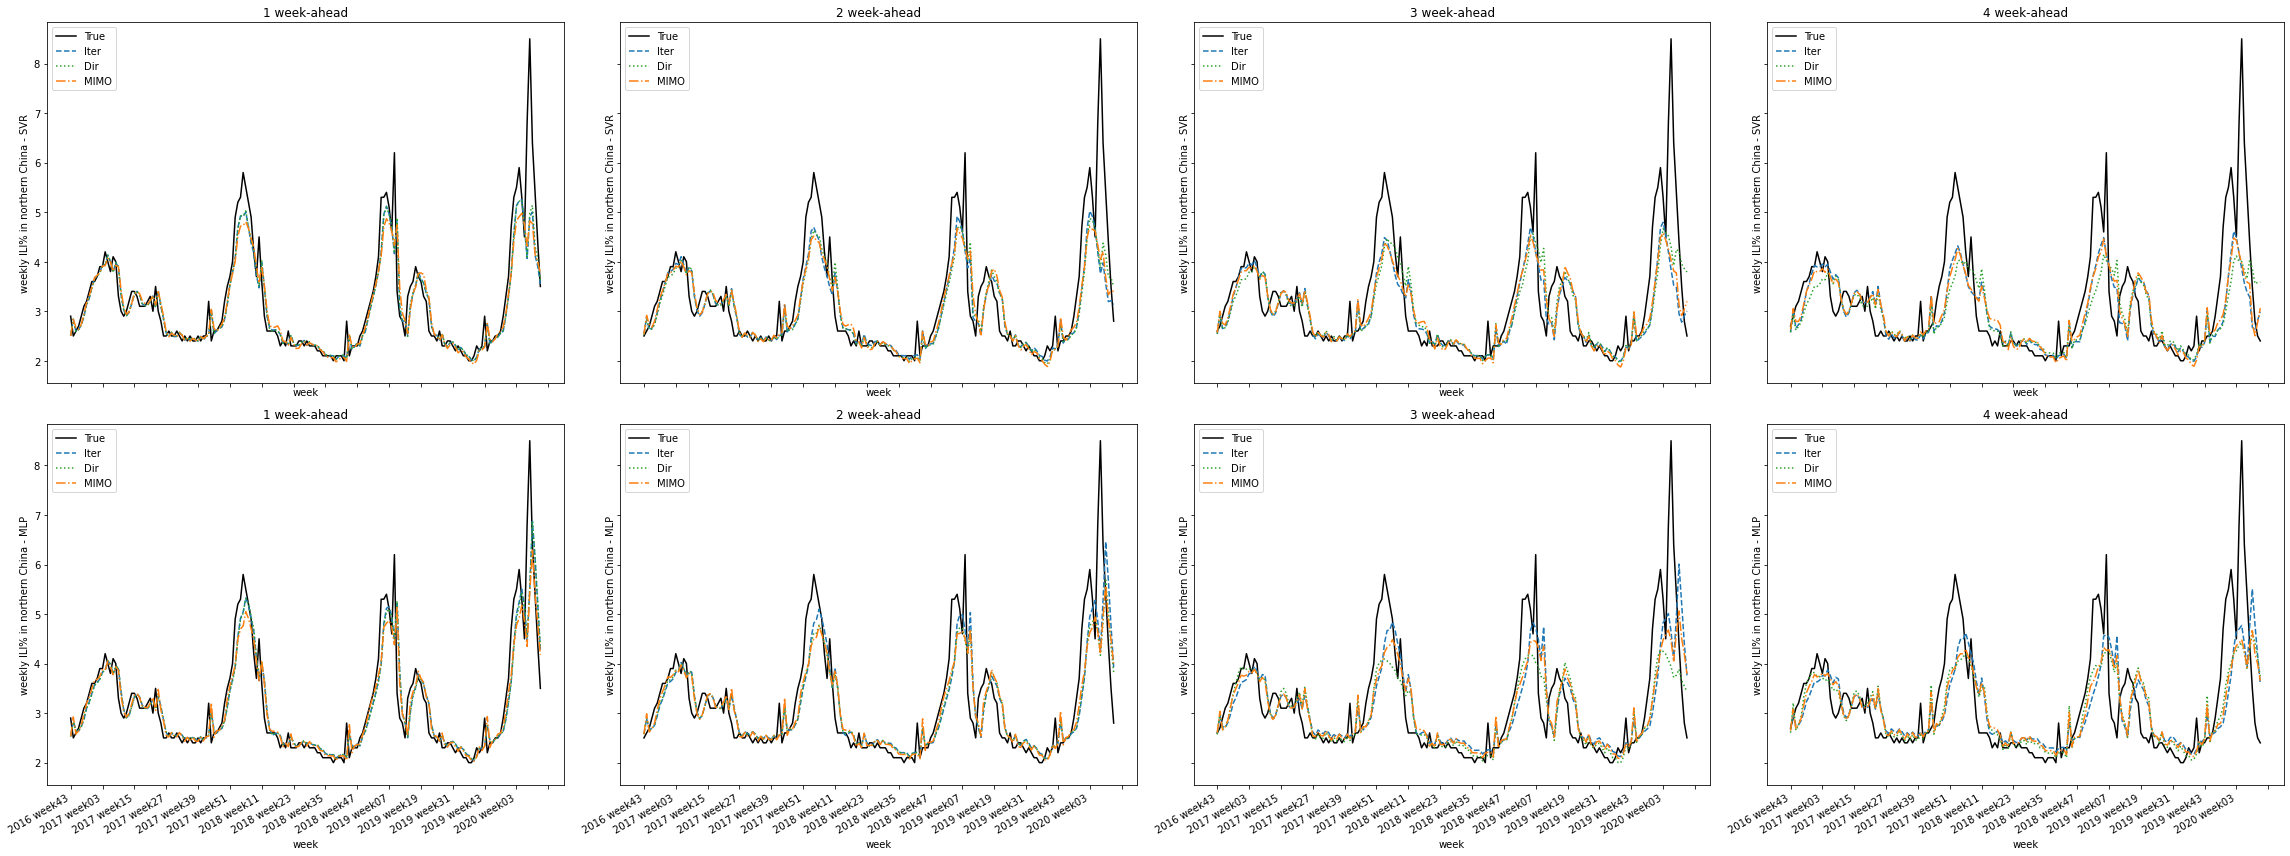

In [4]:
#Nori layout1 share x_axis and y_axis
label = 'Nori'

s_v = []
for h in range(H):
    s_v.append(dict())

fig, axs = plt.subplots(2,H, figsize = (32,12),sharex = True, sharey = True)    


week_tags = pd.read_excel("C:/D/HUST/research_flu_forecast/influenza data/ILI_201001_202012/ILI _201001_202012.xlsx")['time'].dropna().values.tolist()
#averaged results of each model
for m, model in enumerate(models):
    for s in strategies:
        #先读取rank1的内容
        file_name_r1 = label + "_" + model + "_" + s + "_y" + str(H) + "_rank1.xlsx"
        y_test = pd.read_excel(open_path + label+ "/" + model + "_" + s + "/" + file_name_r1, sheet_name="y_test").values
        y_test_pred_sum = pd.read_excel(open_path + label+ "/" + model + "_" + s + "/" + file_name_r1, sheet_name="y_test_pred").values
        for r in range(2,21):
            file_name = label + "_" + model + "_" + s + "_y" + str(H) + "_rank" +str(r) + ".xlsx"
            y_test_pred_sum += pd.read_excel(open_path + label+ "/" + model + "_" + s + "/"  + file_name, sheet_name="y_test_pred").values
        
        y_test_pred_ave = y_test_pred_sum / 20
        
        
        for h in range(H):
            s_v[h]['true'] = y_test[:,h]
            s_v[h][model+"_"+s] = y_test_pred_ave[:,h]
            
for m, model in enumerate(models):
    for h in range(H):            
    
        x_len = len(s_v[h]['true'])
        if h == H-1:
            x_axis = week_tags[-x_len:]
        else:
            x_axis = week_tags[-(x_len+(H-h-1)):-(H-h-1)]
        
        
        ax = axs[m,h]
        ax.set_title(steps[h])
        ax.set_xlabel('week')
        ax.set_ylabel("weekly ILI% in northern China - " + model)
        
        ax.plot(x_axis, s_v[h]['true'], 'k',label = 'True')
        ax.plot(x_axis, s_v[h][model+"_"+'Iter'], '--',color = 'tab:blue', label = 'Iter')
        ax.plot(x_axis, s_v[h][model+"_"+'Dir'], ':',color = 'tab:green',label = 'Dir')
        ax.plot(x_axis, s_v[h][model+"_"+'MIMO'],'-.',color = 'tab:orange',label = 'MIMO')
        ax.legend(loc = 'best')
        
        ax.xaxis.set_major_locator(ticker.MultipleLocator(12))   #横轴相邻2个week_tag间隔为12（周）
        plt.setp(ax.get_xticklabels(), rotation=30, ha="right")                                 #横坐标旋转
        
plt.tight_layout()
plt.savefig('C:/D/HUST/research_flu_forecast/paper/figures & pics/N_ILI_value_H4.png')
plt.show()

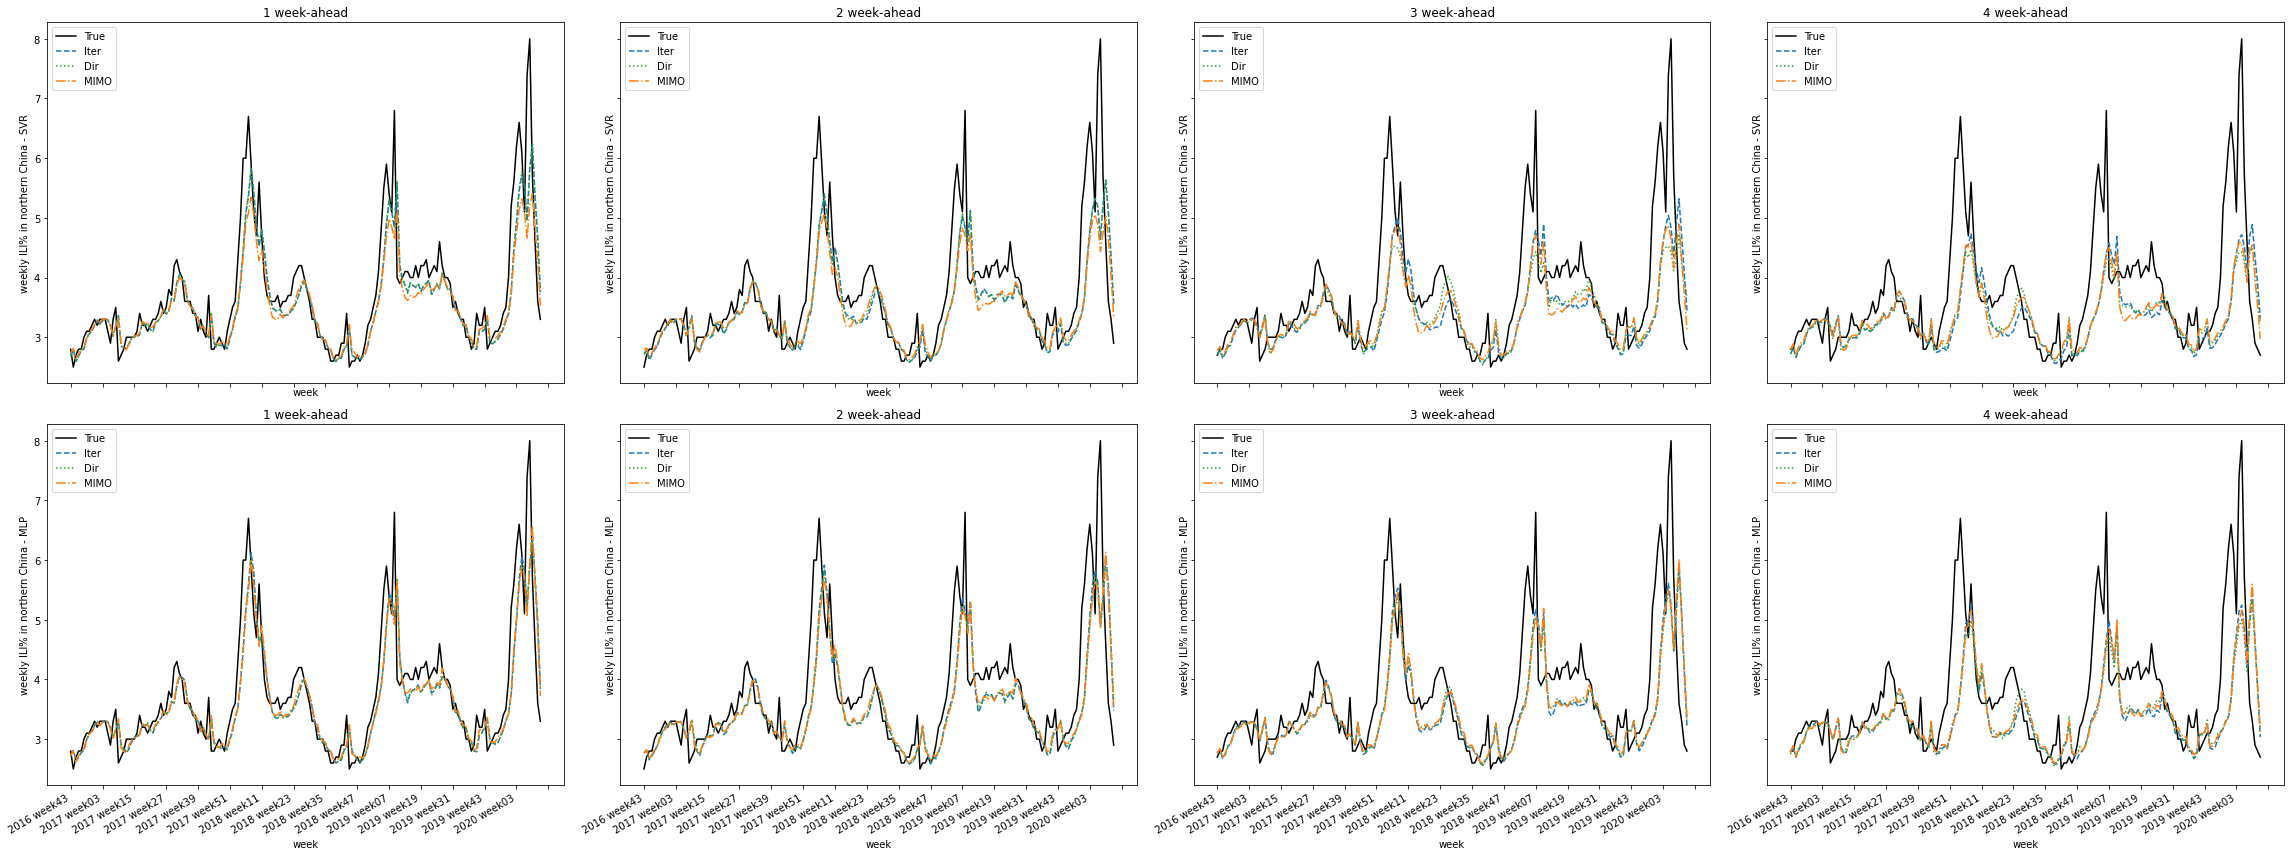

In [72]:
#Sori layout1 share x_axis and y_axis
label = 'Sori'

s_v = []
for h in range(H):
    s_v.append(dict())

fig, axs = plt.subplots(2,H, figsize = (32,12),sharex = True, sharey = True)    


week_tags = pd.read_excel("C:/D/HUST/research_flu_forecast/influenza data/ILI_201001_202012/ILI _201001_202012.xlsx")['time'].dropna().values.tolist()
#averaged results of each model
for m, model in enumerate(models):
    for s in strategies:
        #先读取rank1的内容
        file_name_r1 = label + "_" + model + "_" + s + "_y" + str(H) + "_rank1.xlsx"
        y_test = pd.read_excel(open_path + label+ "/" + model + "_" + s + "/" + file_name_r1, sheet_name="y_test").values
        y_test_pred_sum = pd.read_excel(open_path + label+ "/" + model + "_" + s + "/" + file_name_r1, sheet_name="y_test_pred").values
        for r in range(2,21):
            file_name = label + "_" + model + "_" + s + "_y" + str(H) + "_rank" +str(r) + ".xlsx"
            y_test_pred_sum += pd.read_excel(open_path + label+ "/" + model + "_" + s + "/"  + file_name, sheet_name="y_test_pred").values
        
        y_test_pred_ave = y_test_pred_sum / 20
        
        
        for h in range(H):
            s_v[h]['true'] = y_test[:,h]
            s_v[h][model+"_"+s] = y_test_pred_ave[:,h]
            
for m, model in enumerate(models):
    for h in range(H):            
    
        x_len = len(s_v[h]['true'])
        if h == H-1:
            x_axis = week_tags[-x_len:]
        else:
            x_axis = week_tags[-(x_len+(H-h-1)):-(H-h-1)]
        
        
        ax = axs[m,h]
        ax.set_title(steps[h])
        ax.set_xlabel('week')
        ax.set_ylabel("weekly ILI% in northern China - " + model)
        
        ax.plot(x_axis, s_v[h]['true'], 'k',label = 'True')
        ax.plot(x_axis, s_v[h][model+"_"+'Iter'], '--',color = 'tab:blue', label = 'Iter')
        ax.plot(x_axis, s_v[h][model+"_"+'Dir'], ':',color = 'tab:green',label = 'Dir')
        ax.plot(x_axis, s_v[h][model+"_"+'MIMO'],'-.',color = 'tab:orange',label = 'MIMO')
        ax.legend(loc = 'best')
        
        ax.xaxis.set_major_locator(ticker.MultipleLocator(12))   #横轴相邻2个week_tag间隔为12（周）
        plt.setp(ax.get_xticklabels(), rotation=30, ha="right")                                 #横坐标旋转
        
plt.tight_layout()
plt.savefig('C:/D/HUST/research_flu_forecast/paper/figures & pics/S_ILI_value_H4.png')
plt.show()

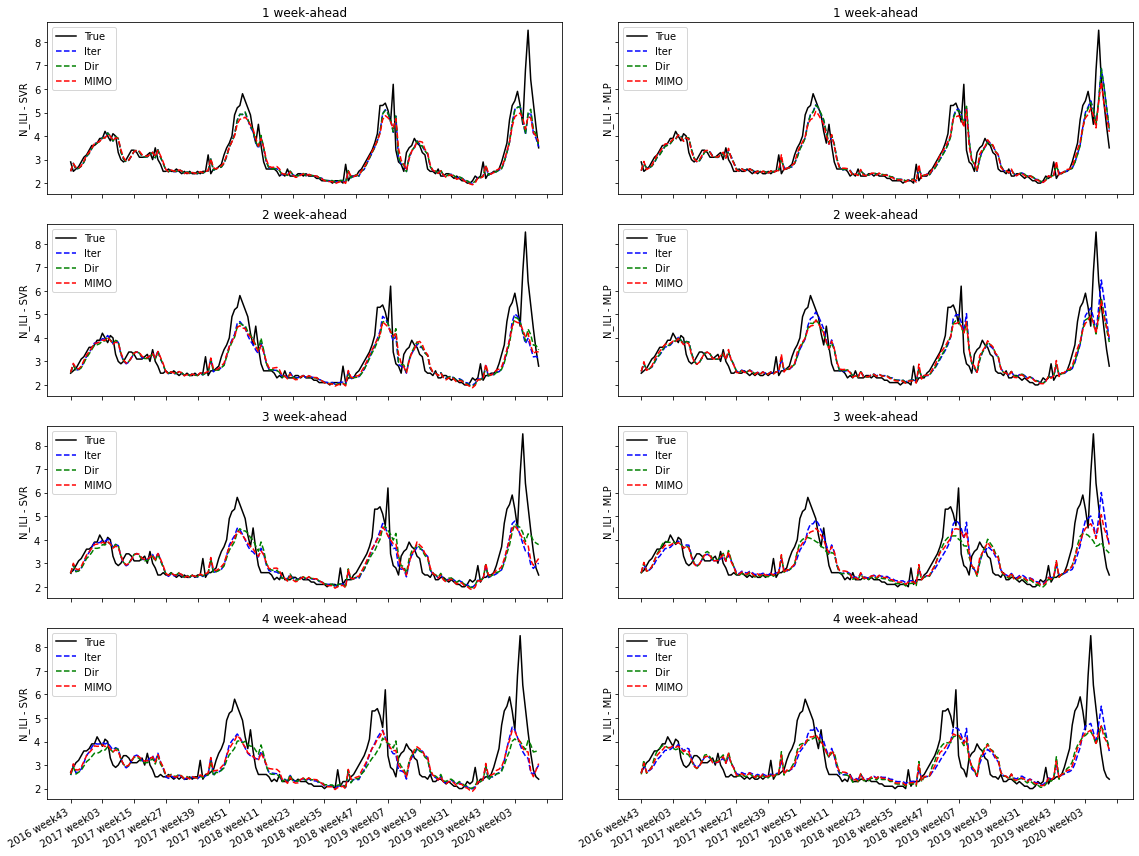

In [10]:
#Nori layout 2 (caanot sharex)
label = 'Nori'

s_v = []
for h in range(H):
    s_v.append(dict())

fig, axs = plt.subplots(H,2, figsize=(16,12),sharex = True, sharey = True)    


week_tags = pd.read_excel("C:/D/HUST/research_flu_forecast/influenza data/ILI_201001_202012/ILI _201001_202012.xlsx")['time'].dropna().values.tolist()
#averaged results of each model
for m, model in enumerate(models):
    for s in strategies:
        #先读取rank1的内容
        file_name_r1 = label + "_" + model + "_" + s + "_y" + str(H) + "_rank1.xlsx"
        y_test = pd.read_excel(open_path + label+ "/" + model + "_" + s + "/" + file_name_r1, sheet_name="y_test").values
        y_test_pred_sum = pd.read_excel(open_path + label+ "/" + model + "_" + s + "/" + file_name_r1, sheet_name="y_test_pred").values
        for r in range(2,21):
            file_name = label + "_" + model + "_" + s + "_y" + str(H) + "_rank" +str(r) + ".xlsx"
            y_test_pred_sum += pd.read_excel(open_path + label+ "/" + model + "_" + s + "/"  + file_name, sheet_name="y_test_pred").values
        
        y_test_pred_ave = y_test_pred_sum / 20
        
        
        for h in range(H):
            s_v[h]['true'] = y_test[:,h]
            s_v[h][model+"_"+s] = y_test_pred_ave[:,h]
            
for h in range(H): 
    for m, model in enumerate(models):
               
    
        x_len = len(s_v[h]['true'])
        if h == H-1:
            x_axis = week_tags[-x_len:]
        else:
            x_axis = week_tags[-(x_len+(H-h-1)):-(H-h-1)]
        
        
        ax = axs[h,m]
        ax.set_title(steps[h])
        #ax.set_xlabel('week')
        ax.set_ylabel("N_ILI - " + model)

        ax.plot(x_axis, s_v[h]['true'], 'k',label = 'True')
        ax.plot(x_axis, s_v[h][model+"_"+'Iter'], '--',color = 'blue', label = 'Iter')
        ax.plot(x_axis, s_v[h][model+"_"+'Dir'], '--',color = 'green',label = 'Dir')
        ax.plot(x_axis, s_v[h][model+"_"+'MIMO'],'--',color = 'red',label = 'MIMO')
        ax.legend(loc = 'best')
        
        ax.xaxis.set_major_locator(ticker.MultipleLocator(12))   #横轴相邻2个week_tag间隔为12（周）
        plt.setp(ax.get_xticklabels(), rotation=30, ha="right")  #横坐标旋转
        
plt.tight_layout()
plt.show()